<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/Monte_Carlo_Candlestick_Chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade mplfinance
!pip install --upgrade pandas_ta

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_ta as ta
import datetime as dt

In [3]:
mu = 0.05
sigma = 0.07
S0 = 100
days = 500

In [4]:
def plot_candle_sticks_macd(mu, sigma, S0, days):
    e = np.random.normal(size = [24 * 60, days])

    delta_t = 1.0/(365.0 * 24 * 60)
    prev_S = S0

    list_data = []
    for jdx in range(days):
        candle_data = []

        for idx in range(24 * 60):
            next_S = prev_S * np.exp((mu - 0.5 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * e[idx, jdx])
            candle_data += [next_S]
            prev_S = next_S

        list_data += [candle_data]

    S = np.array(list_data).T

    date_index = pd.DatetimeIndex([dt.date(2025, 1, 1) + dt.timedelta(delta) for delta in range(days)])

    candlestick_df = pd.DataFrame({
        'Open' : S[0, ...],
        'High' : np.max(S, axis = 0, keepdims = False),
        'Low' : np.min(S, axis = 0, keepdims = False),
        'Close' : S[-1, ...],
    }, index = date_index)

    # Step 2: Calculate technical indicators using pandas-ta
    multiple_ema = pd.concat(
        [
            candlestick_df,
            candlestick_df.ta.supertrend(high = "High", low = "Low", close = "Close", length=10, multiplier=3),
            candlestick_df.ta.macd(close="Close", fast=12, slow=26, signal=9),
            candlestick_df.ta.rsi(close="Close", length=14)
        ],
        axis = 1
    )

    data_df = multiple_ema
    display(data_df)

    plots = [
        mpf.make_addplot(data_df["SUPERTs_10_3.0"], color="red"),
        mpf.make_addplot(data_df["SUPERTl_10_3.0"], color="green"),
        mpf.make_addplot(data_df["MACD_12_26_9"], panel=1, color="blue", ylabel="MACD"),
        mpf.make_addplot(data_df["MACDs_12_26_9"], panel=1, color="orange"),
        mpf.make_addplot(
            data_df["MACDh_12_26_9"],
            type="bar",
            panel=1,
            color=["green" if val >= 0 else "red" for val in data_df["MACDh_12_26_9"]],
            alpha=0.5,
        ),
        mpf.make_addplot(data_df["RSI_14"], panel=2, color="purple", ylabel="RSI"),
    ]

    mpf.plot(
        data_df,
        type="candle",  # Candlestick chart
        style="yahoo",  # Chart style
        addplot=plots,
        figscale = 4,
        panel_ratios=(3, 1, 1)
    )

,Open,High,Low,Close,SUPERT_10_3.0,SUPERTd_10_3.0,SUPERTl_10_3.0,SUPERTs_10_3.0,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14
2025-01-01,99.992059,100.054501,99.649744,99.956665,0.000000,1,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02,99.971591,100.154205,99.670861,99.779257,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,99.771142,100.403151,99.722772,100.323638,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-04,100.325202,100.655392,100.107924,100.110042,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-05,100.108071,100.162569,99.574289,99.850072,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-05-11,119.443076,119.604509,119.043991,119.154454,120.901786,-1,NaN,120.901786,-0.053996,-0.037185,-0.016811,45.253894
2026-05-12,119.166453,119.961030,119.043703,119.897197,120.901786,-1,NaN,120.901786,-0.021598,-0.003830,-0.017769,52.850118
2026-05-13,119.878071,120.412433,119.653260,119.678069,120.901786,-1,NaN,120.901786,-0.013450,0.003455,-0.016905,50.618606
2026-05-14,119.687115,120.623493,119.660969,120.308975,120.901786,-1,NaN,120.901786,0.043417,0.048257,-0.004840,56.335184


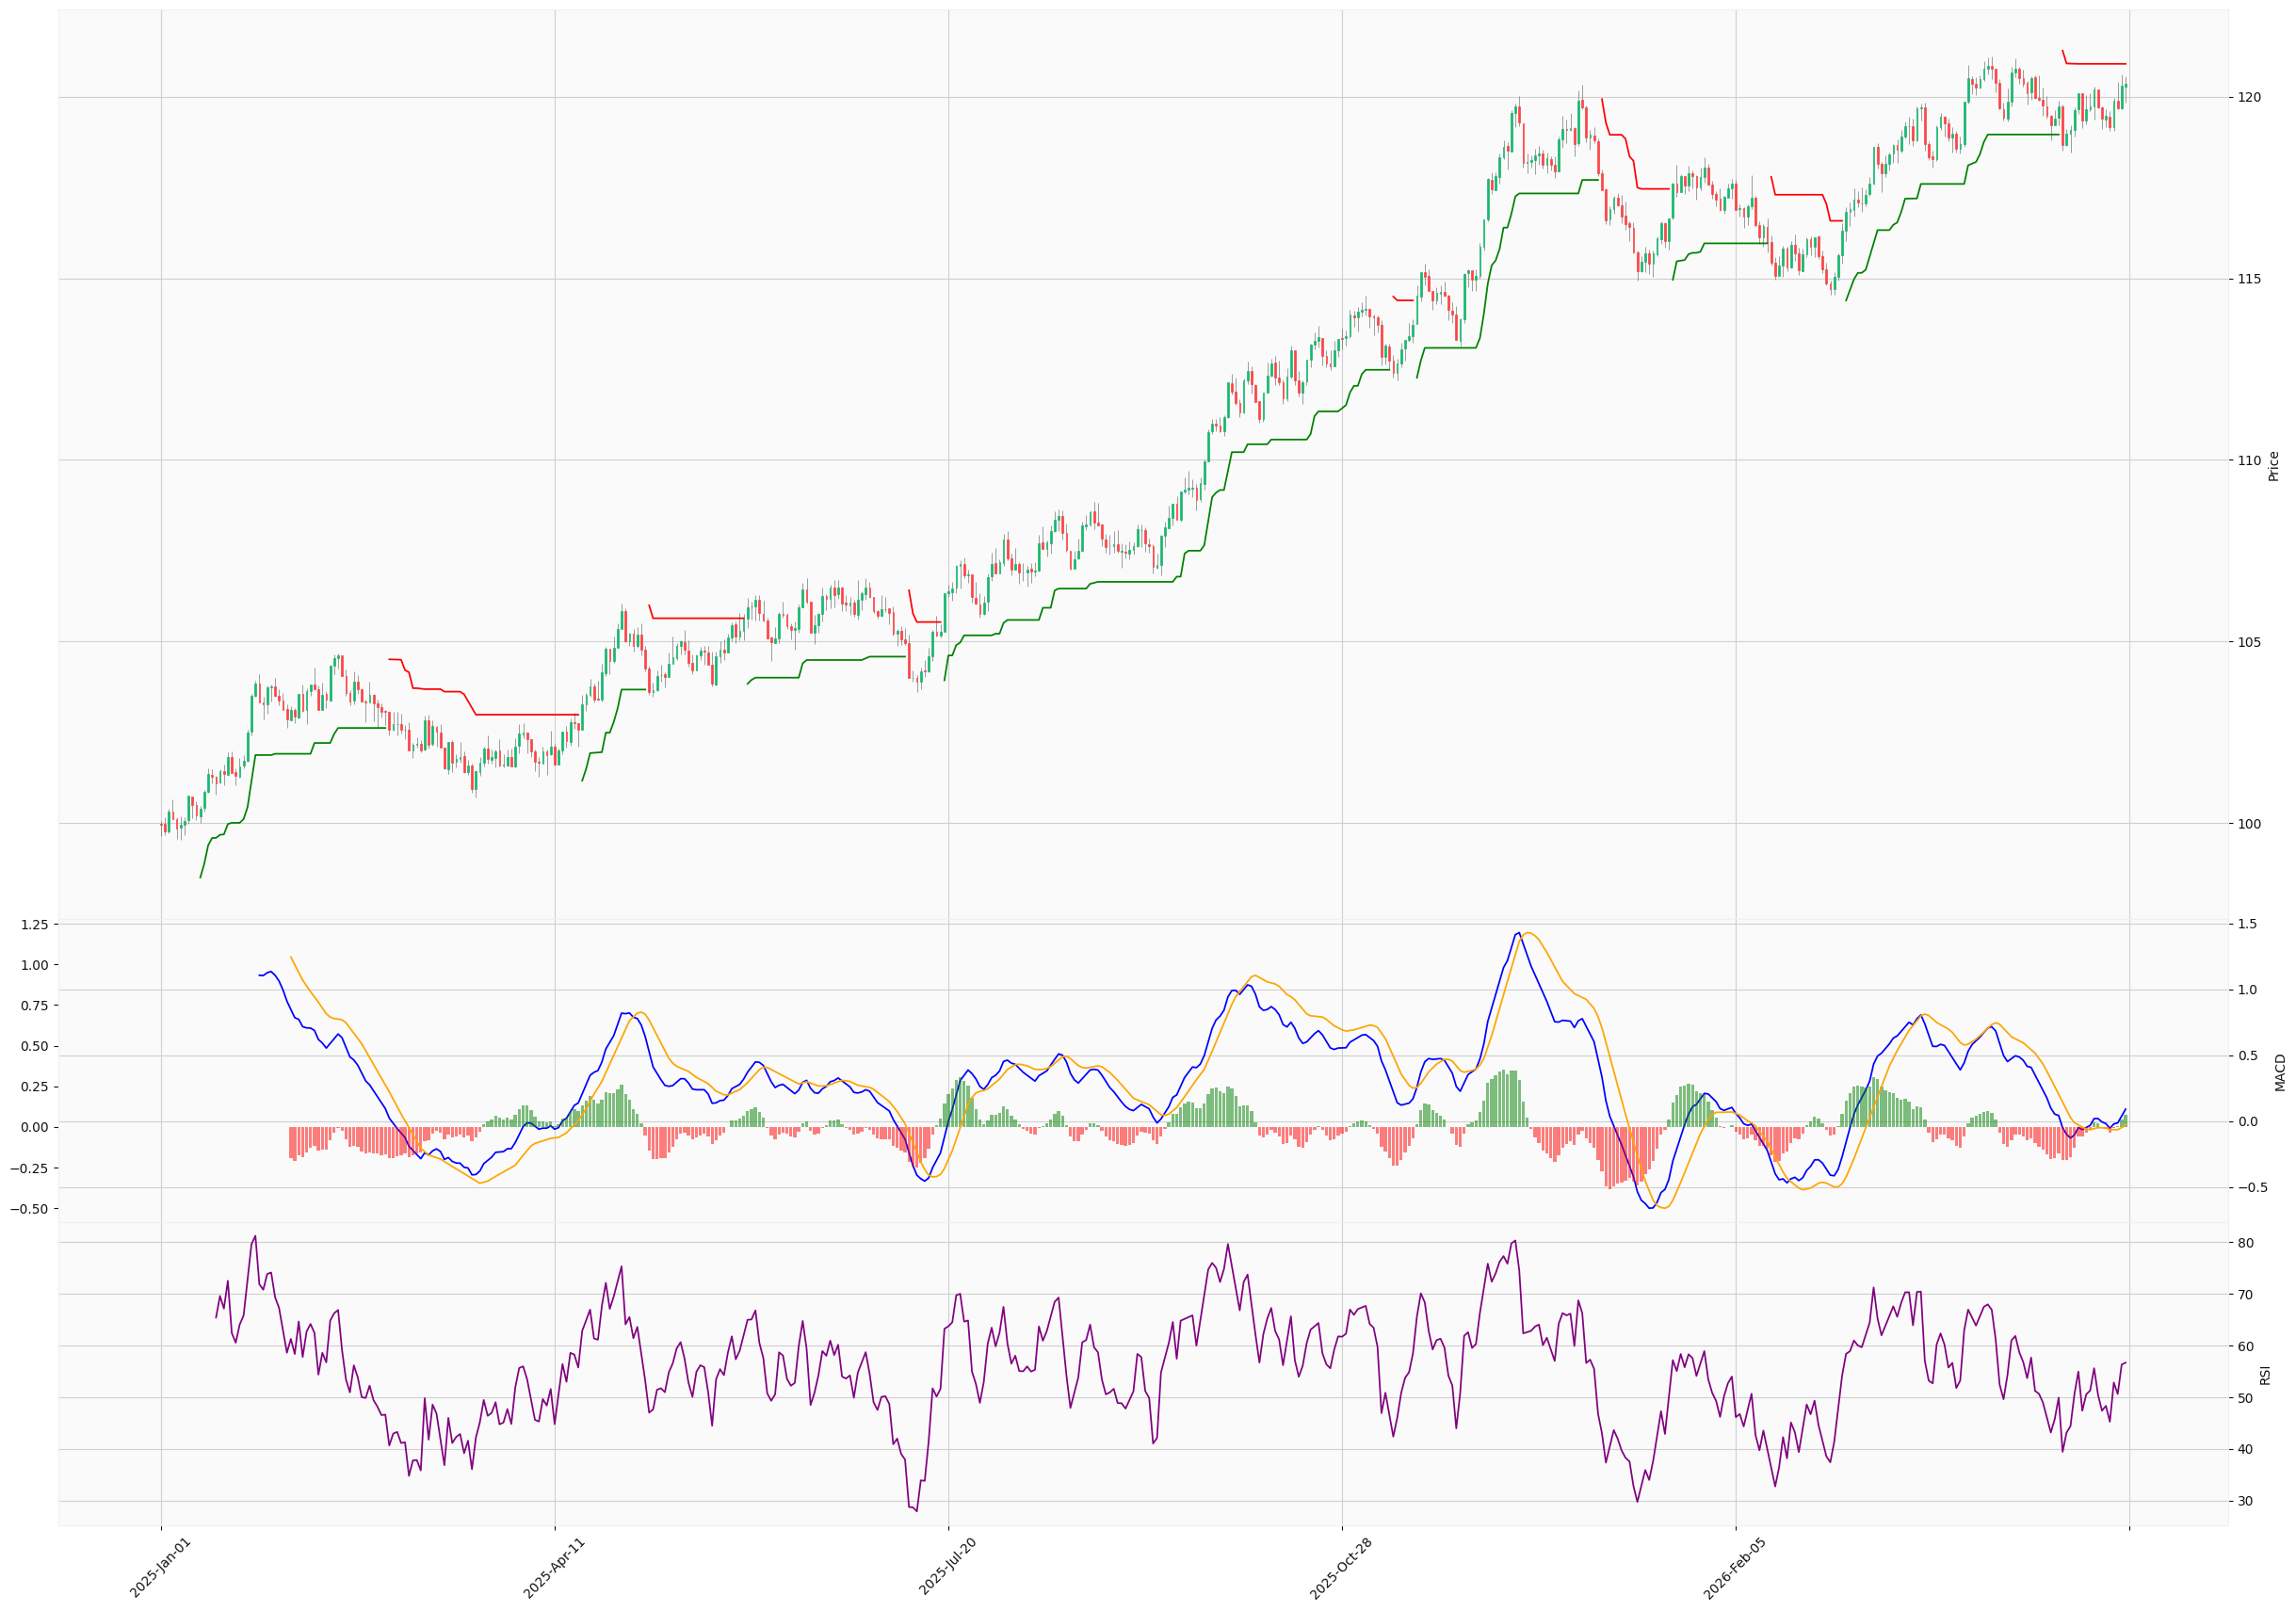

In [5]:
plot_candle_sticks_macd(mu, sigma, S0, days)